In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [87]:
from fastai.imports import *

In [88]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
#checking null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
##fillling null value
modes=df.mode().iloc[0]
df.fillna(modes,inplace=True)

In [93]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [94]:
##Summary stats of numeric column
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

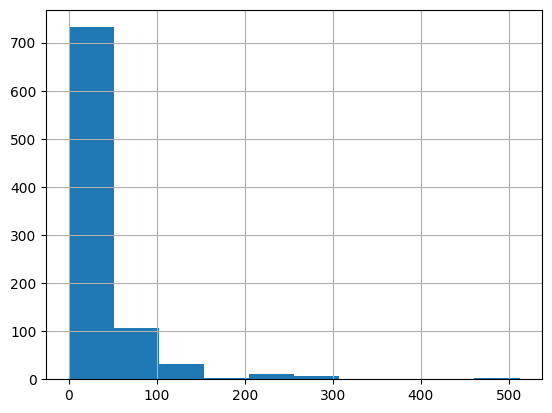

In [95]:
##fare is Showing a positive skewness which can be a problem while training the nn
df['Fare'].hist()


<Axes: >

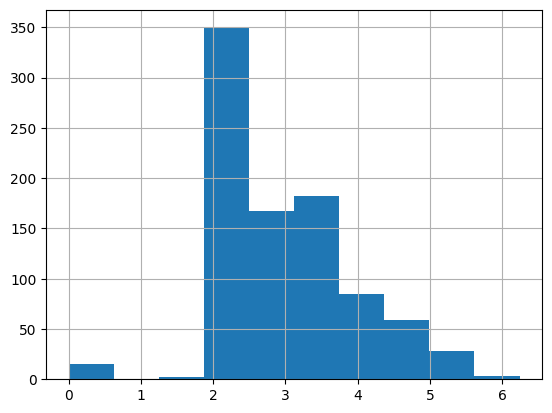

In [96]:
##treating postive skewnees(mean > median)
df['LogFare']=np.log1p(df['Fare'])
df['LogFare'].hist() #now more even dist post transformation

In [97]:
##For edc purpose
#What if it ws negative skew like grades then use
#df['grade']=np.log1p(df['grade'].max()-df['values']) #note here broadcsting is used
#But why we are subtrcating from max bcz:
"""We know log transformations (log(x) or log1p(x)) work well to reduce right (positive) skewness.
So, what if we could flip our left-skewed data to behave like right-skewed?"""

'We know log transformations (log(x) or log1p(x)) work well to reduce right (positive) skewness.\nSo, what if we could flip our left-skewed data to behave like right-skewed?'

In [98]:
##Pclass looks like categorical value so we can store its unique value
pclasses=sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [99]:
###Summary of non numeric value
df.describe(include=object)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [100]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked']) #Get dummies help to get duumy values ex 0,1 for sex and also removes original column


In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [102]:
added_cols=['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True


In [103]:
import torch
from torch import tensor

In [104]:
t_dep=tensor(df.Survived)

In [105]:
indep_cols=['Age','SibSp','Parch','LogFare']+added_cols

In [106]:
df[indep_cols]

,Age,SibSp,Parch,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,False,True,False,False,True,False,False,True
1,38.0,1,0,4.280593,True,False,True,False,False,True,False,False
2,26.0,0,0,2.188856,True,False,False,False,True,False,False,True
3,35.0,1,0,3.990834,True,False,True,False,False,False,False,True
4,35.0,0,0,2.202765,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.639057,False,True,False,True,False,False,False,True
887,19.0,0,0,3.433987,True,False,True,False,False,False,False,True
888,24.0,1,2,3.196630,True,False,False,False,True,False,False,True
889,26.0,0,0,3.433987,False,True,True,False,False,True,False,False


In [107]:
##For ed puprose : float() vs astype(float)
a=df[indep_cols].values
a.astype(float)

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [24.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [108]:
t_indep=tensor(df[indep_cols].values.astype(float))
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]], dtype=torch.float64)

In [109]:
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]], dtype=torch.float64)

In [110]:
##Creating fucntion to automate preprocessing:
def preprocessing(df):
    modes=df.mode().iloc[0]
    df.fillna(modes,inplace=True)
    df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
    df['LogFare']=np.log1p(df['Fare'])
    added_cols=['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
    t_dep=tensor(df.Survived)
    indep_cols=['Age','SibSp','Parch','LogFare']+added_cols
    t_indep=tensor(df[indep_cols].values.astype(float))
    return t_dep,t_indep


    

In [111]:
##Setting up a simple linear model
# Linear model is  predicts the output (target variable) as a linear combination of input features. 
#We will need a coefficien for each column in t_indep and we will pick random  numbers in the range(-0.5,0.5)

In [112]:
torch.manual_seed(442)
n_coeff=t_indep.shape[1]
coeffs=torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [113]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.1096,   0.1386,   0.4818,  ...,  -0.0000,   0.0000,   0.3625],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-14.8128,   0.0000,   0.0000,  ...,  -0.0000,   0.2103,   0.0000]],
       dtype=torch.float64)

In [114]:
###age value are quite big in comarison to other we need to normalize all
vals,ind=t_indep.max(0)
t_indep=t_indep/vals

In [115]:
t_indep ## normalize value b/w 0-1

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]],
       dtype=torch.float64)

In [116]:
#for ed purpose
(t_indep * coeffs).sum() #Will sum whole value of matrix and return single value

tensor(-8.4091, dtype=torch.float64)

In [117]:
preds=(t_indep * coeffs).sum(axis=1) #rows wise addition

In [118]:
preds[:2] 


tensor([ 0.1412, -0.5725], dtype=torch.float64)

In [119]:
##However these are not useful prediction are coefffs where randoms
loss=torch.abs(preds-t_dep).mean() #torch.abs()computes the element-wise absolute value of a tensor. It returns a new tensor where each element is the non-negative value of the corresponding element in the input tensor.
loss

tensor(0.5200, dtype=torch.float64)

In [120]:
##function to calculate pred and loss
def calc_preds(coeffs,indeps):
    return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs,indeps,deps):
    return (torch.abs(calc_preds(coeffs,indeps)-deps).mean())

In [121]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [122]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.5200, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [123]:
#coeffs.grad.zero_()#So that each time we call loss.backward() our grad is reset and we avoid accumulation
loss.backward()# TO ask pytorch to calcualte gradient now

In [124]:
coeffs.grad


tensor([-0.0483,  0.0118, -0.0041, -0.0804, -0.1975,  0.1111, -0.1235, -0.0426,
         0.0797, -0.1886, -0.0617,  0.1639])

In [125]:
##One gradient descent step
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs,t_indep,t_dep))

tensor(0.4922, dtype=torch.float64)


## Training the linear model


In [126]:
# Step 1 creating validation set 
# fastai RandomSplitter return indices to split data into trn and valid sets
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter()(df)



In [127]:
trn_indep,val_indep=t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep=t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [128]:
#Step 2 functions to update coeffs
#Functions to update coeffs
def update_coeffs(coeffs,lr):
    coeffs.sub_(coeffs.grad*lr)
    coeffs.grad.zero_()

In [129]:
#step 3 : cretaing one epoch update loss and printing updated loss
def one_epoch(coeffs,lr):
    loss=calc_loss(coeffs,trn_indep,trn_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs,lr)
    print(f"{loss:.3f}",end="; ")
        



In [130]:
#initializing coeffs
def init_coeffs():
    return (torch.rand(n_coeff)-0.5).requires_grad_()

In [131]:
##Step 4: tarin model
def train_model(epochs=30,lr=0.01):
    coeffs=init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs,lr=lr)
        return coeffs

In [132]:
coeffs=train_model(30,lr=0.2)

1.012; 

In [133]:
coeffs

tensor([ 0.1668,  0.1822, -0.4245, -0.2340, -0.2613, -0.3089,  0.2760,  0.0979,
        -0.0624, -0.3627,  0.0989,  0.1729], requires_grad=True)

In [134]:
def show_coeffs():
    return dict(zip(indep_cols,coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(0.1668),
 'SibSp': tensor(0.1822),
 'Parch': tensor(-0.4245),
 'LogFare': tensor(-0.2340),
 'Sex_female': tensor(-0.2613),
 'Sex_male': tensor(-0.3089),
 'Pclass_1': tensor(0.2760),
 'Pclass_2': tensor(0.0979),
 'Pclass_3': tensor(-0.0624),
 'Embarked_C': tensor(-0.3627),
 'Embarked_Q': tensor(0.0989),
 'Embarked_S': tensor(0.1729)}

In [135]:
##measuring accuracy : 
#step 1: calcualte preds using coeffs with validated indep variable
preds=calc_preds(coeffs,val_indep)

In [136]:
#As we need to rpedict survived or not we willassume value > 0.5 is survived
results=val_dep.bool()==(preds>0.5)
results[:10]

tensor([False,  True,  True,  True, False,  True,  True,  True,  True, False])

In [137]:
results.float().mean()

tensor(0.6685)

In [138]:
## function to calculate accuracy:
def acc(coeffs):
    return((val_dep.bool()==(calc_preds(coeffs,val_indep)>0.5)).float().mean())
acc(coeffs)


tensor(0.6685)

In [139]:
##Now our preds may go above 1 and below 0 which is problem so we have to use sigmoid


In [140]:
##To fix this we must every preds thriygh sigmoid to get output b/w 0-1
def calc_preds(coeffs,indeps):
    return torch.sigmoid(indeps*coeffs).sum(axis=1)

In [141]:
coeffs=train_model(epochs=100000,lr=100)
coeffs

5.621; 

tensor([ -8.6147,  -1.2127,  -1.9649, -12.0137,  -8.9246, -15.6546,  -6.3955,
         -5.5951, -12.5983,  -4.4274,  -2.2978, -17.6119], requires_grad=True)

In [142]:
acc(coeffs)

tensor(0.3315)

In [143]:
show_coeffs()

{'Age': tensor(-8.6147),
 'SibSp': tensor(-1.2127),
 'Parch': tensor(-1.9649),
 'LogFare': tensor(-12.0137),
 'Sex_female': tensor(-8.9246),
 'Sex_male': tensor(-15.6546),
 'Pclass_1': tensor(-6.3955),
 'Pclass_2': tensor(-5.5951),
 'Pclass_3': tensor(-12.5983),
 'Embarked_C': tensor(-4.4274),
 'Embarked_Q': tensor(-2.2978),
 'Embarked_S': tensor(-17.6119)}

In [151]:
##matrix product

In [148]:
#clean code to do matrix multiplication and its sum can be done by 
val_indep=val_indep.float()
coeffs=coeffs.float()#we may need to change the dtype to float or double for matrix multiplication so both are of same dtype
def calc_preds(coeffs,indeps):
    coeffs=coeffs.float()
    indeps=indeps.float()
    return torch.sigmoid(indeps @coeffs)

In [145]:
#Matrix matrix product : to do matrix matrix product we need to convert coeff inti as matrix by adding column
torch.rand(n_coeff,1)
def init_coeffs():
    return (torch.rand(n_coeff,1)*0.1).requires_grad_()

In [ ]:
#converting dep variable to column vector
trn_dep=trn_dep[:,None]
val_dep=val_dep[:,None]


In [149]:
coeffs=train_model(lr=100)


0.505; 

In [150]:
acc(coeffs)

tensor(0.7079)

# A neural network / dl

In [197]:
import torch

# Let's say n_coeff = number of input features

def init_coeffs(n_hidden=20, n_layers=5):
    layers = []

    # Input → first hidden layer
    layers.append((torch.rand(n_coeff, n_hidden, dtype=torch.float32) - 0.5) / n_hidden)

    # Hidden → hidden layers
    for _ in range(n_layers - 1):
        layers.append((torch.rand(n_hidden, n_hidden, dtype=torch.float32) - 0.5) / n_hidden)

    # Last hidden → output layer
    last_layer = torch.rand(n_hidden, 1, dtype=torch.float32) - 0.3

    # Bias for final layer (make it a tensor, not scalar!)
    cont = torch.rand(1, dtype=torch.float32)

    # Enable autograd
    layers = [layer.requires_grad_() for layer in layers]
    last_layer = last_layer.requires_grad_()
    cont = cont.requires_grad_() 

    # Return everything as a tuple
    return layers, last_layer, cont


In [201]:
##Creating neural net
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers, last_layer, const = coeffs  
    res = indeps.float()

    #looping through each hiidn layer
    for W in layers:
        res = torch.relu(res @ W)

    # Last layer and bias
    res = res @ last_layer + const

    return torch.sigmoid(res)


In [204]:
##As  we have more than one layer of coeffs:
def update_coeffs(coeffs, lr):
    layers, last_layer, cont = coeffs  # unpack properly
    
    # Update each hidden layer tensor
    for W in layers:
        W.sub_(W.grad * lr)
        W.grad.zero_()
    
    # Update final layer
    last_layer.sub_(last_layer.grad * lr)
    last_layer.grad.zero_()
    
    # Update bias term
    cont.sub_(cont.grad * lr)
    cont.grad.zero_()


In [213]:
 coeffs=train_model(lr=1.4)


0.520; 

In [214]:
acc(coeffs)


tensor(0.3315)

4